<a href="https://colab.research.google.com/github/Indian1999/klaszterezes/blob/main/Klaszterez%C3%A9s_szombat13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Mall_Customers.csv", sep = ",")
data.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"}, inplace = True)
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x_kmeans = data[['Age', 'Annual_Income', 'Spending_Score']]

In [ ]:
print(x_kmeans.isna().sum())

Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


In [ ]:
plt.figure(figsize=(4,4))
df = pd.DataFrame(x_kmeans, columns=x_kmeans.columns)
cm = df.corr()
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.cluster import KMeans
errors = []
k_values = range(2, 21)
for k in k_values:
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(x_kmeans)
  errors.append(km.inertia_)


In [ ]:
plt.figure(figsize=(5,4))
plt.plot(k_values, errors, marker="o")

In [ ]:
km = KMeans(n_clusters=5, random_state=0).fit(x_kmeans)
labels = km.labels_
#print(labels)
x_kmeans["labels"] = labels
data["kmeans_labels"] = labels
data.head()

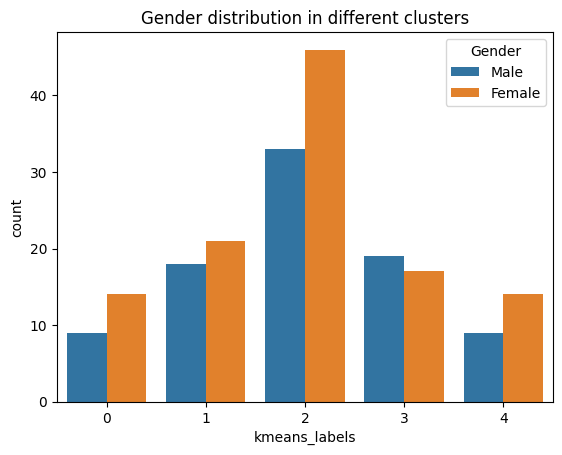

In [ ]:
sns.countplot(data=data, x="kmeans_labels", hue = "Gender")
plt.title("Gender distribution in different clusters")
plt.show()